In [1]:
# imports
import os
import math
import dill
from itertools import permutations, combinations

import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as linreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx



%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
basedir_VR = '/home/mplitt/VR_scratch'
figdir_local = '/mnt/BigDisk/YMazeResults'
figdir_remote = '/STX3_2P_results/YMaze/behavior'

In [3]:
ko_sessions, ctrl_sessions = stx.behavior.model_comparison.get_session_dicts()

4467975.1 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}, {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.1 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467975.1 {'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}
4467975.1 {'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}
4467975.1 {'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467975.1 {'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467975.1 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 2, 'scan': 10, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.1 {'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': -1}
4467975.1 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': -1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}
4467975.2 {'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 {'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.3 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.3 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}
4467975.3 {'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 7, 'novel': -1}
4467975.3 {'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 7, 'novel': -1}
4467975.3 {'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.3 {'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': -1}
4467975.3 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 6, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.3 {'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': -1}
4467975.3 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 4, 'novel': -1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1})
4467975.4 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.4 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}
4467975.4 {'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}
4467975.4 {'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': 1}
4467975.4 {'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}
4467975.4 {'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}
4467975.4 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.4 {'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': 1}
4467975.4 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 4, 'novel': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.5 {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.5 {'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467975.5 {'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1}
4467975.5 {'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 7, 'novel': -1}
4467975.5 {'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467975.5 {'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1}
4467975.5 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 8, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467975.5 {'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': -1}
4467975.5 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': -1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 9, 'novel': -1})
4467331.1 {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 7, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 {'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 {'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1}
4467331.1 {'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}
4467331.1 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 4, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 2, 'scan': 1, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.1 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel': -1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': 1}, {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 12, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': 1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 4, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467331.2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}
4467332.1 {'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 1, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.1 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': -1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.2 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 14, 'novel': 1}, {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.2 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}, {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 9, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.2 {'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}
4467332.2 {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.2 {'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}
4467332.2 {'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}
4467332.2 ({'date': '06_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1}, {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 6, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467332.2 {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 2, 'scan': 2, 'novel': 1}
4467332.2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': 1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 4, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 ({'date': '06_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1}, {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 5, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 {'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': -1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


4467333.1 ({'date': '08_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel': -1}, {'date': '08_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1})


/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/TwoPUtils/spatial_analyses.py:65: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


In [4]:
lick_varpos_results_familiar = stx.behavior.run_model_comparisons.run_model_comparisons_familiar(ko_sessions,ctrl_sessions, 'lick_varpos')
with open(os.path.join(figdir_local,'lick_varpos_results_familiar.pkl'),'wb') as file:
    dill.dump(lick_varpos_results_familiar,file)

log likelihood [-716.55197317 -720.0111723  -722.77767772 -724.52132503 -720.81453821
 -722.0952586  -723.27396548 -724.38561577]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 0
M0, true log likelihood -716.551973, highest perm log likelihood -716.551973, 'p' value 1.000000
M1, true log likelihood -720.011172, highest perm log likelihood -707.428864, 'p' value 0.216000
M2, true log likelihood -722.777678, highest perm log likelihood -702.855598, 'p' value 0.368000
M3, true log likelihood -724.521325, highest perm log likelihood -703.126354, 'p' value 0.448000
M4, true log likelihood -720.814538, highest perm log likelihood -705.672744, 'p' value 0.248000
M5, true log likelihood -722.095259, highest perm log likelihood -706.186699, 'p' value 0.272000
M6, true log likelihood -723.273965, highest perm log likelihood -704.317572, 'p' value 0.352000
M7, true log likelihood -724.385616, highest perm log likelihood -704.580007, 'p' value 0.440000


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


log likelihood [-663.1886512  -657.94421573 -659.96109921 -655.99355086 -662.86492635
 -659.20986852 -660.94206662 -660.35789427]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])


perm 50
perm 100
perm 150
perm 200
Day 1
M0, true log likelihood -663.188651, highest perm log likelihood -663.188651, 'p' value 1.000000
M1, true log likelihood -657.944216, highest perm log likelihood -654.966531, 'p' value 0.040000
M2, true log likelihood -659.961099, highest perm log likelihood -650.935805, 'p' value 0.144000
M3, true log likelihood -655.993551, highest perm log likelihood -650.505510, 'p' value 0.032000
M4, true log likelihood -662.864926, highest perm log likelihood -647.976159, 'p' value 0.240000
M5, true log likelihood -659.209869, highest perm log likelihood -651.638381, 'p' value 0.104000
M6, true log likelihood -660.942067, highest perm log likelihood -645.650498, 'p' value 0.216000
M7, true log likelihood -660.357894, highest perm log likelihood -649.991624, 'p' value 0.160000
log likelihood [-518.86582076 -531.11448936 -539.27840601 -544.59714501 -536.57313497
 -537.32544904 -532.20724081 -541.63185734]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 2
M0, t

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/BigDisk/YMazeResutls/lick_varpos_results_familiar.pkl'

In [6]:
with open(os.path.join(figdir_local,'lick_varpos_results_familiar.pkl'),'wb') as file:
    dill.dump(lick_varpos_results_familiar,file)

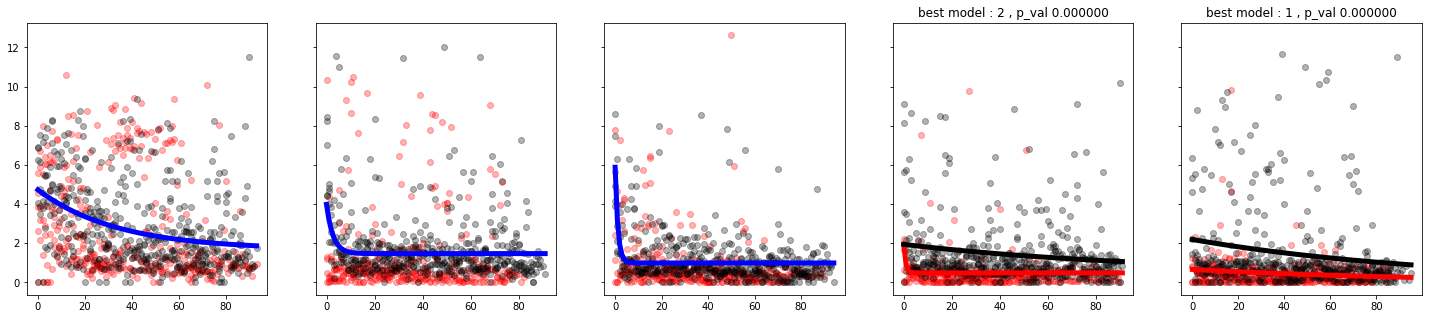

In [7]:
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions,lick_varpos_results_familiar,'lick_varpos')
fig.savefig(os.path.join(figdir_local,'lick_varpos_results_familiar.png'))
fig.savefig(os.path.join(figdir_local,'lick_varpos_results_familiar.pdf'))

log likelihood [-3.30133354 -6.30507076  0.52383736 -3.6153329   1.75226049 -1.44513124
 -4.7502174  -3.4710103 ]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 0
M0, true log likelihood -3.301334, highest perm log likelihood -3.301333, 'p' value 1.000000
M1, true log likelihood -6.305071, highest perm log likelihood 7.964639, 'p' value 0.512000
M2, true log likelihood 0.523837, highest perm log likelihood 19.145338, 'p' value 0.176000
M3, true log likelihood -3.615333, highest perm log likelihood 16.542520, 'p' value 0.272000
M4, true log likelihood 1.752260, highest perm log likelihood 19.045453, 'p' value 0.088000
M5, true log likelihood -1.445131, highest perm log likelihood 14.754995, 'p' value 0.200000
M6, true log likelihood -4.750217, highest perm log likelihood 18.309265, 'p' value 0.296000
M7, true log likelihood -3.471010, highest perm log likelihood 17.026617, 'p' value 0.256000
log likelihood [69.98584774 87.37243186 73.01747531 85.46213153 75.9744677  86.87662424
 74.45467

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


perm 100


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \


perm 150
perm 200
Day 4
M0, true log likelihood 125.980336, highest perm log likelihood 125.980336, 'p' value 1.000000
M1, true log likelihood 134.244924, highest perm log likelihood 138.338799, 'p' value 0.040000
M2, true log likelihood 133.695750, highest perm log likelihood 138.155330, 'p' value 0.032000
M3, true log likelihood 128.237189, highest perm log likelihood 135.759287, 'p' value 0.080000
M4, true log likelihood 128.755145, highest perm log likelihood 132.117998, 'p' value 0.064000
M5, true log likelihood 133.980392, highest perm log likelihood 135.614562, 'p' value 0.032000
M6, true log likelihood 134.374631, highest perm log likelihood 137.897531, 'p' value 0.024000
M7, true log likelihood 134.295452, highest perm log likelihood 135.122819, 'p' value 0.016000


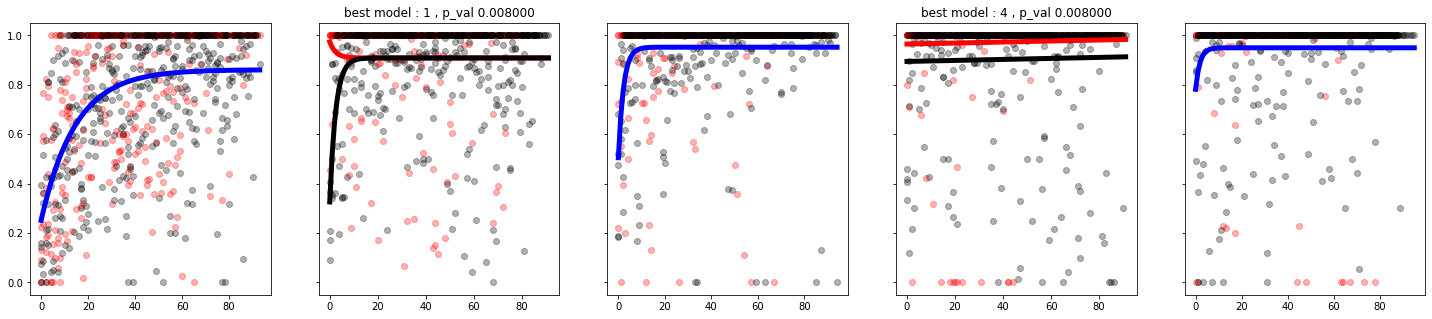

In [4]:
lick_acc_results_familiar = stx.behavior.run_model_comparisons.run_model_comparisons_familiar(ko_sessions,ctrl_sessions, 'lick_acc')
with open(os.path.join(figdir_local,'lick_acc_results_familiar.pkl'),'wb') as file:
    dill.dump(lick_acc_results_familiar,file)
    
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions,lick_acc_results_familiar,'lick_acc')
fig.savefig(os.path.join(figdir_local,'lick_acc_results_familiar.png'))
fig.savefig(os.path.join(figdir_local,'lick_acc_results_familiar.pdf'))

log likelihood [  4.80149766 -19.82628245 -20.01558257 -28.47494604 -26.20547724
 -28.65393436 -28.18200689 -28.5894693 ]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \


perm 50
perm 100


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


perm 150
perm 200
Day 0
M0, true log likelihood 4.801498, highest perm log likelihood 4.801498, 'p' value 1.000000
M1, true log likelihood -19.826282, highest perm log likelihood 155.376077, 'p' value 0.680000
M2, true log likelihood -20.015583, highest perm log likelihood 151.724866, 'p' value 0.688000
M3, true log likelihood -28.474946, highest perm log likelihood 161.781320, 'p' value 0.896000
M4, true log likelihood -26.205477, highest perm log likelihood 162.052240, 'p' value 0.848000
M5, true log likelihood -28.653934, highest perm log likelihood 167.197191, 'p' value 0.840000
M6, true log likelihood -28.182007, highest perm log likelihood 161.491812, 'p' value 0.832000
M7, true log likelihood -28.589469, highest perm log likelihood 161.394302, 'p' value 0.832000
log likelihood [81.83413814 61.79565647 63.12305035 60.80422256 64.03960849 58.69741883
 60.82693438 60.50032174]
perm 0
perm 50
perm 100


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction


perm 150
perm 200
Day 1
M0, true log likelihood 81.834138, highest perm log likelihood 81.835805, 'p' value 1.000000
M1, true log likelihood 61.795656, highest perm log likelihood 126.299976, 'p' value 0.664000
M2, true log likelihood 63.123050, highest perm log likelihood 116.276577, 'p' value 0.664000
M3, true log likelihood 60.804223, highest perm log likelihood 124.447551, 'p' value 0.704000
M4, true log likelihood 64.039608, highest perm log likelihood 125.089413, 'p' value 0.528000
M5, true log likelihood 58.697419, highest perm log likelihood 124.382183, 'p' value 0.784000
M6, true log likelihood 60.826934, highest perm log likelihood 124.439759, 'p' value 0.712000
M7, true log likelihood 60.500322, highest perm log likelihood 124.365343, 'p' value 0.728000
log likelihood [152.7252175  116.3719628  117.95853403 111.85308662 114.8541927
 112.74492339 110.88443237 112.05044166]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 2
M0, true log likelihood 152.725218, highest perm log lik

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


perm 50
perm 100
perm 150
perm 200


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \


Day 3
M0, true log likelihood 162.335832, highest perm log likelihood 162.335832, 'p' value 1.000000
M1, true log likelihood 141.086569, highest perm log likelihood 219.848044, 'p' value 0.736000
M2, true log likelihood 125.022776, highest perm log likelihood 217.345337, 'p' value 0.952000
M3, true log likelihood 125.206724, highest perm log likelihood 228.617814, 'p' value 0.944000
M4, true log likelihood 131.481704, highest perm log likelihood 216.188060, 'p' value 0.944000
M5, true log likelihood 125.747112, highest perm log likelihood 218.949420, 'p' value 0.936000
M6, true log likelihood 120.580860, highest perm log likelihood 224.893933, 'p' value 0.976000
M7, true log likelihood 121.706935, highest perm log likelihood 223.264425, 'p' value 0.960000
log likelihood [92.10088686 42.36686639 41.34581779 38.7206328  42.32065905 39.10819411
 37.8823505  38.09459585]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 4
M0, true log likelihood 92.100887, highest perm log likelihood 92.100900

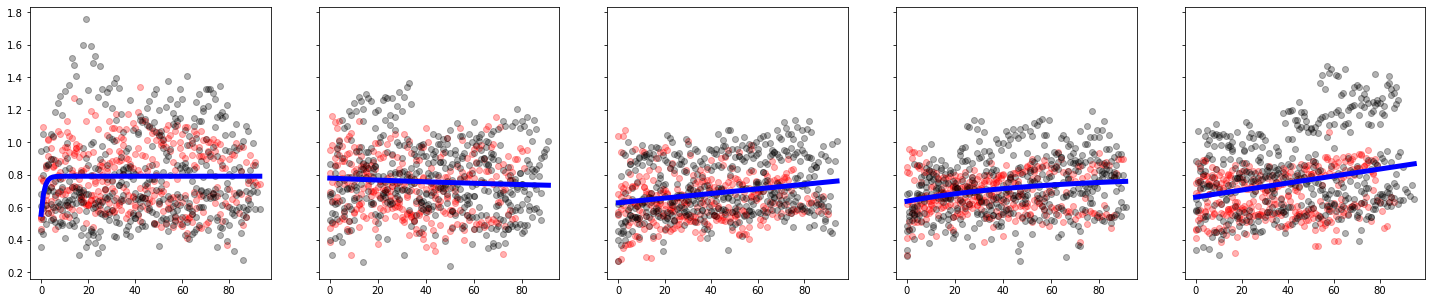

In [5]:
armspeed_results_familiar = stx.behavior.run_model_comparisons.run_model_comparisons_familiar(ko_sessions,ctrl_sessions, 'arm_speed_norm')
with open(os.path.join(figdir_local,'armspeed_results_familiar.pkl'),'wb') as file:
    dill.dump(armspeed_results_familiar,file)
    
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions, armspeed_results_familiar,'arm_speed_norm')
fig.savefig(os.path.join(figdir_local,'armspeed_results_familiar.png'))
fig.savefig(os.path.join(figdir_local,'armspeed_results_familiar.pdf'))

In [5]:
lick_varpos_results_novel = stx.behavior.run_model_comparisons.run_model_comparisons_novel(ko_sessions,ctrl_sessions, 'lick_varpos')
with open(os.path.join(figdir_local,'lick_varpos_results_novel.pkl'),'wb') as file:
    dill.dump(lick_varpos_results_novel,file)

log likelihood [-132.32925909 -131.60361792 -132.82680121 -131.55851071 -131.78427161
 -131.27487931 -131.19123447 -131.83608288]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])


perm 50
perm 100
perm 150


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction


perm 200
Day 0
M0, true log likelihood -132.329259, highest perm log likelihood -132.329258, 'p' value 0.984000
M1, true log likelihood -131.603618, highest perm log likelihood -125.387668, 'p' value 0.144000
M2, true log likelihood -132.826801, highest perm log likelihood -128.867748, 'p' value 0.240000
M3, true log likelihood -131.558511, highest perm log likelihood -125.449402, 'p' value 0.104000
M4, true log likelihood -131.784272, highest perm log likelihood -130.073252, 'p' value 0.104000
M5, true log likelihood -131.274879, highest perm log likelihood -125.263663, 'p' value 0.104000
M6, true log likelihood -131.191234, highest perm log likelihood -124.798602, 'p' value 0.080000
M7, true log likelihood -131.836083, highest perm log likelihood -126.062472, 'p' value 0.124000


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:49: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:49: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c


log likelihood [-107.88381493 -109.21923152 -109.80677041 -110.20412713 -113.27230406
 -109.23672214 -109.9469766  -110.26477058]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:116: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:116: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: ov

optimal parameters not found


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + \


perm 50
optimal parameters not found
optimal parameters not found
perm 100
optimal parameters not found
optimal parameters not found
perm 150
optimal parameters not found
optimal parameters not found
perm 200
Day 1
M0, true log likelihood -107.883815, highest perm log likelihood -107.883452, 'p' value 0.612000
M1, true log likelihood -109.219232, highest perm log likelihood -106.088293, 'p' value 0.384000
M2, true log likelihood -109.806770, highest perm log likelihood -105.453020, 'p' value 0.624000
M3, true log likelihood -110.204127, highest perm log likelihood -104.538975, 'p' value 0.504000
M4, true log likelihood -113.272304, highest perm log likelihood -102.029207, 'p' value 0.992000
M5, true log likelihood -109.236722, highest perm log likelihood -103.546278, 'p' value 0.120000
M6, true log likelihood -109.946977, highest perm log likelihood -102.690093, 'p' value 0.228000
M7, true log likelihood -110.264771, highest perm log likelihood -102.694299, 'p' value 0.256000
log likel

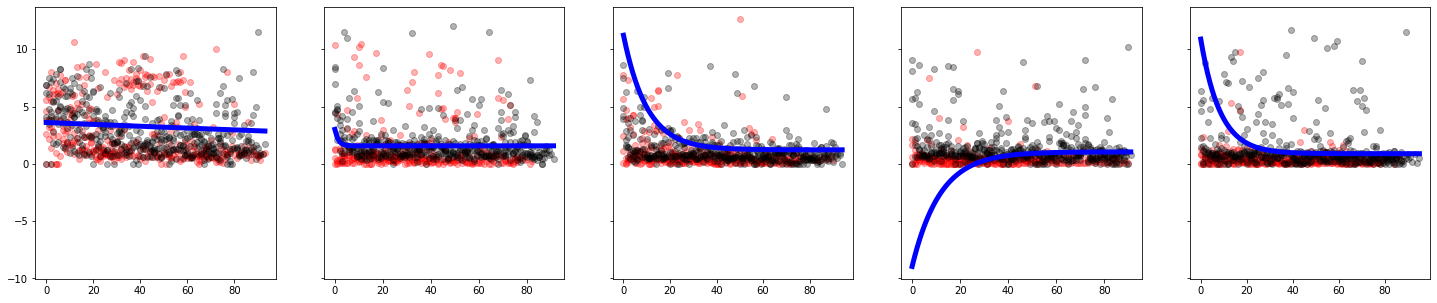

In [6]:
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions,lick_varpos_results_novel,'lick_varpos')
fig.savefig(os.path.join(figdir_local,'lick_varpos_results_novel.png'))
fig.savefig(os.path.join(figdir_local,'lick_varpos_results_novel.pdf'))

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:116: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])


log likelihood [-9.60076511 -4.57033849 -7.77198481 -7.77155219 -7.01087571 -5.13150875
 -7.16843977 -7.16843993]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:153: RuntimeWarning: overflow encountered in exp


perm 50


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:65: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


perm 100
perm 150
perm 200
Day 0
M0, true log likelihood -9.600765, highest perm log likelihood -9.600765, 'p' value 1.000000
M1, true log likelihood -4.570338, highest perm log likelihood -3.260840, 'p' value 0.048000
M2, true log likelihood -7.771985, highest perm log likelihood -6.448458, 'p' value 0.064000
M3, true log likelihood -7.771552, highest perm log likelihood -6.386051, 'p' value 0.056000
M4, true log likelihood -7.010876, highest perm log likelihood -5.493113, 'p' value 0.072000
M5, true log likelihood -5.131509, highest perm log likelihood -2.682823, 'p' value 0.096000
M6, true log likelihood -7.168440, highest perm log likelihood -5.965342, 'p' value 0.072000
M7, true log likelihood -7.168440, highest perm log likelihood -5.965343, 'p' value 0.072000
log likelihood [10.17619584  8.04390605  7.80117761  7.80125613  8.81449002  8.50183877
  8.79675375  8.79737983]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:83: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c


perm 50
perm 100
perm 150
perm 200
Day 1
M0, true log likelihood 10.176196, highest perm log likelihood 10.176206, 'p' value 0.280000
M1, true log likelihood 8.043906, highest perm log likelihood 16.412802, 'p' value 0.344000
M2, true log likelihood 7.801178, highest perm log likelihood 17.003269, 'p' value 0.672000
M3, true log likelihood 7.801256, highest perm log likelihood 17.301239, 'p' value 0.604000
M4, true log likelihood 8.814490, highest perm log likelihood 18.935349, 'p' value 0.512000
M5, true log likelihood 8.501839, highest perm log likelihood 17.925025, 'p' value 0.296000
M6, true log likelihood 8.796754, highest perm log likelihood 18.835659, 'p' value 0.488000
M7, true log likelihood 8.797380, highest perm log likelihood 18.835701, 'p' value 0.488000
log likelihood [10.79490811 10.77475887  8.02722383  8.01077151  7.70975018  3.61459842
  7.30282791  7.16253565]
perm 0


/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:49: RuntimeWarning: overflow encountered in exp
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c


perm 50
perm 100
perm 150
perm 200
Day 2
M0, true log likelihood 10.794908, highest perm log likelihood 10.794911, 'p' value 1.000000
M1, true log likelihood 10.774759, highest perm log likelihood 16.700594, 'p' value 0.264000
M2, true log likelihood 8.027224, highest perm log likelihood 17.714983, 'p' value 0.896000
M3, true log likelihood 8.010772, highest perm log likelihood 17.132804, 'p' value 0.820000
M4, true log likelihood 7.709750, highest perm log likelihood 18.471126, 'p' value 0.956000
M5, true log likelihood 3.614598, highest perm log likelihood 18.501810, 'p' value 0.896000
M6, true log likelihood 7.302828, highest perm log likelihood 16.420675, 'p' value 0.928000
M7, true log likelihood 7.162536, highest perm log likelihood 15.708893, 'p' value 0.916000
log likelihood [4.56036766 5.62441919 7.28042355 8.09857149 8.87723865 8.81409068
 8.80370238 8.70364865]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 3
M0, true log likelihood 4.560368, highest perm log likelihood 4.560

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:49: RuntimeWarning: overflow encountered in multiply
  return (a0 * x[1, :] + a1 * (1 - x[1, :])) * np.exp(-b * x[0, :]) + c


perm 50
perm 100
perm 150
perm 200
Day 4
M0, true log likelihood 55.629534, highest perm log likelihood 55.629569, 'p' value 0.232000
M1, true log likelihood 55.623758, highest perm log likelihood 56.976815, 'p' value 0.316000
M2, true log likelihood 56.067707, highest perm log likelihood 64.311266, 'p' value 0.064000
M3, true log likelihood 54.398776, highest perm log likelihood 61.084937, 'p' value 0.680000
M4, true log likelihood 57.105063, highest perm log likelihood 60.708470, 'p' value 0.184000
M5, true log likelihood 57.067405, highest perm log likelihood 62.315287, 'p' value 0.128000
M6, true log likelihood 56.494273, highest perm log likelihood 62.212541, 'p' value 0.112000
M7, true log likelihood 56.495247, highest perm log likelihood 62.212781, 'p' value 0.128000


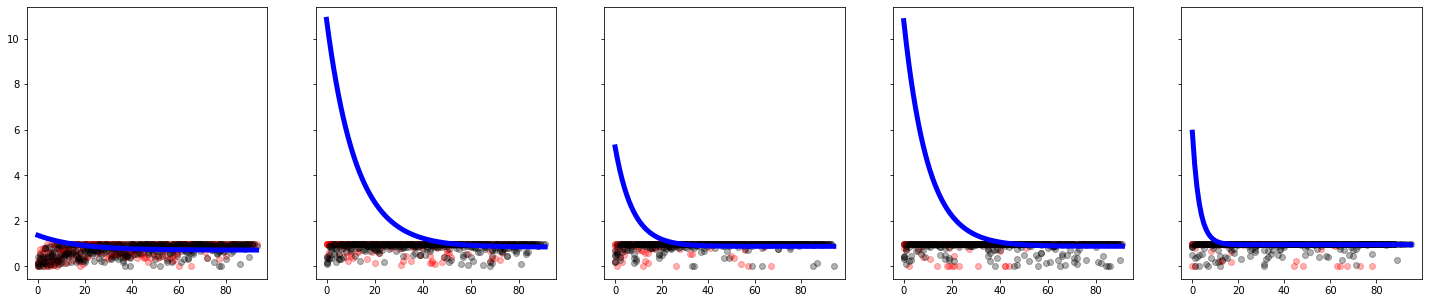

In [7]:
lick_acc_results_novel = stx.behavior.run_model_comparisons.run_model_comparisons_novel(ko_sessions,ctrl_sessions, 'lick_acc')
with open(os.path.join(figdir_local,'lick_acc_results_novel.pkl'),'wb') as file:
    dill.dump(lick_acc_results_novel,file)
    
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions,lick_acc_results_novel,'lick_acc')
fig.savefig(os.path.join(figdir_local,'lick_acc_results_novel.png'))
fig.savefig(os.path.join(figdir_local,'lick_acc_results_novel.pdf'))

In [8]:
armspeed_results_novel = stx.behavior.run_model_comparisons.run_model_comparisons_familiar(ko_sessions,ctrl_sessions, 'arm_speed_norm')
with open(os.path.join(figdir_local,'armspeed_results_novel.pkl'),'wb') as file:
    dill.dump(armspeed_results_novel,file)
    
fig,ax = stx.behavior.run_model_comparisons.plot_famnov_results(ko_sessions, ctrl_sessions, armspeed_results_familiar,'arm_speed_norm')
fig.savefig(os.path.join(figdir_local,'armspeed_results_novel.png'))
fig.savefig(os.path.join(figdir_local,'armspeed_results_novel.pdf'))

log likelihood [  4.80145195 -17.1421841  -21.64493227 -16.19701006 -26.20562302
 -28.65506236 -27.86458133 -28.1707245 ]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 0
M0, true log likelihood 4.801452, highest perm log likelihood 4.801452, 'p' value 1.000000
M1, true log likelihood -17.142184, highest perm log likelihood 155.449803, 'p' value 0.624000
M2, true log likelihood -21.644932, highest perm log likelihood 151.724754, 'p' value 0.760000
M3, true log likelihood -16.197010, highest perm log likelihood 161.780321, 'p' value 0.576000
M4, true log likelihood -26.205623, highest perm log likelihood 162.051974, 'p' value 0.856000
M5, true log likelihood -28.655062, highest perm log likelihood 167.196483, 'p' value 0.856000
M6, true log likelihood -27.864581, highest perm log likelihood 171.514739, 'p' value 0.840000
M7, true log likelihood -28.170724, highest perm log likelihood 161.618106, 'p' value 0.824000
log likelihood [82.93426841 61.38082441 64.85238766 65.50288632 64.0404009

/home/mplitt/repos/STX3KO_analyses/STX3KO_analyses/behavior/models.py:134: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * (b0 * x[1, :] + b1 * (1 - x[1, :])) * x[0, :]) + c0 * x[1, :] + c1 * (1 - x[1, :])


perm 150
perm 200
Day 1
M0, true log likelihood 82.934268, highest perm log likelihood 82.934364, 'p' value 0.816000
M1, true log likelihood 61.380824, highest perm log likelihood 125.245731, 'p' value 0.696000
M2, true log likelihood 64.852388, highest perm log likelihood 116.276544, 'p' value 0.584000
M3, true log likelihood 65.502886, highest perm log likelihood 122.169007, 'p' value 0.512000
M4, true log likelihood 64.040401, highest perm log likelihood 123.625855, 'p' value 0.576000
M5, true log likelihood 60.383190, highest perm log likelihood 124.382832, 'p' value 0.672000
M6, true log likelihood 59.863171, highest perm log likelihood 124.438141, 'p' value 0.720000
M7, true log likelihood 60.498770, highest perm log likelihood 122.029597, 'p' value 0.712000
log likelihood [152.73646787 108.59957711 117.95919134 132.07232227 114.85929531
 112.74531109 111.19376207 109.83221305]
perm 0
perm 50
perm 100
perm 150
perm 200
Day 2
M0, true log likelihood 152.736468, highest perm log li

NameError: name 'armspeed_results_familiar' is not defined

In [ ]:
# concatenate all novel sessions and fit same models

In [ ]:
# additional running speed analyses

In [4]:
[early_rz_results, late_rz_results] =  stx.behavior.run_model_comparisons.run_model_comparisons_rev_lr(ko_sessions, ctrl_sessions)
with open(os.path.join(figdir_local,'lr_extinction_results.pkl'),'wb') as file:
    dill.dump({'early_rz_results':early_rz_results, 'late_rz_results':late_rz_results},file)

log-likelihood [-312.77570171 -290.33276824 -282.19990969 -289.87139327 -288.91328775
 -293.39598023 -289.5806135  -291.07650016]
running permutations
perm  0
perm  50
perm  100
perm  150
perm  200
M0, true log likelihood -312.775702, highest perm log likelihood -312.775702, 'p' value 1.000000
M1, true log likelihood -290.332768, highest perm log likelihood -291.817187, 'p' value 0.000000
M2, true log likelihood -282.199910, highest perm log likelihood -283.002667, 'p' value 0.000000
M3, true log likelihood -289.871393, highest perm log likelihood -287.602463, 'p' value 0.008000
M4, true log likelihood -288.913288, highest perm log likelihood -285.630771, 'p' value 0.008000
M5, true log likelihood -293.395980, highest perm log likelihood -289.793779, 'p' value 0.008000
M6, true log likelihood -289.580614, highest perm log likelihood -290.621063, 'p' value 0.000000
M7, true log likelihood -291.076500, highest perm log likelihood -292.851498, 'p' value 0.000000
best model  2
log-likeliho

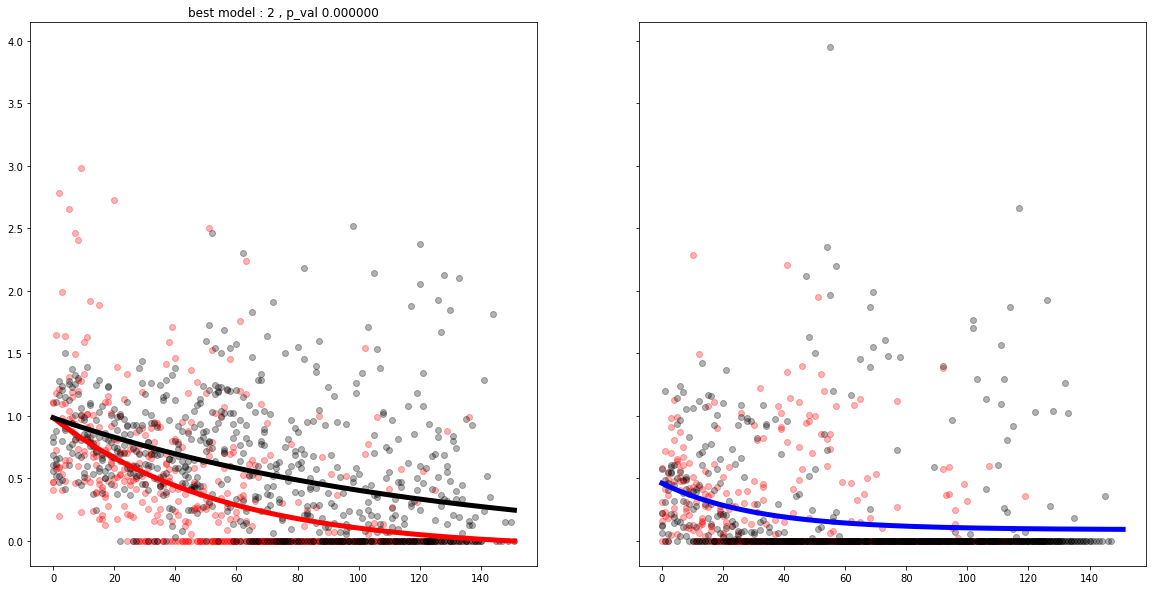

In [5]:
fig,ax = stx.behavior.run_model_comparisons.plot_reversal_lrs(ko_sessions, ctrl_sessions, early_rz_results, late_rz_results)
fig.savefig(os.path.join(figdir_local,'lr_extinction.png'))
fig.savefig(os.path.join(figdir_local,'lr_extinction.pdf'))

In [ ]:

# plot number of omissions

# plot average lickrate for each mouse for different trial types

# plot probe trial lickrate